In [335]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from ISLP import confusion_table
from matplotlib.pyplot import subplots

from sklearn.metrics import RocCurveDisplay
roc_curve_est = RocCurveDisplay.from_estimator 
roc_curve_pred = RocCurveDisplay.from_predictions 

In [336]:
#import data
Batting = pd.read_csv('../projectData/Batting.csv')
People = pd.read_csv('../projectData/People.csv')
HOF = pd.read_csv('../projectData/HallOfFame.csv')

In [337]:
#group all of the hall of famers that were players
HOF_inducted = HOF[(HOF['inducted'] == 'Y') & (HOF['category'] == 'Player')]
#group the hall of fame batters based on batting RF feature importance list
HOF_batting = HOF_inducted.merge(Batting[['playerID', 'G', 'AB', 'SO', 'R', 'H', 'RBI', '2B', 'BB']], on='playerID', how='left')

#aggregate batting statistics per Hall of Fame player
hof_player_stats = HOF_batting.groupby('playerID').agg({
    'G': 'sum',
    'AB': 'sum', 
    'SO': 'sum',
    'R': 'sum',
    'H': 'sum',
    'RBI': 'sum',
    '2B': 'sum',
    'BB': 'sum'
}).reset_index()

#add rate statistics
hof_player_stats['AB_per_G'] = hof_player_stats['AB'] / hof_player_stats['G']
hof_player_stats['SO_per_G'] = hof_player_stats['SO'] / hof_player_stats['G']
hof_player_stats['R_per_G'] = hof_player_stats['R'] / hof_player_stats['G']
hof_player_stats['H_per_G'] = hof_player_stats['H'] / hof_player_stats['G']
hof_player_stats['RBI_per_G'] = hof_player_stats['RBI'] / hof_player_stats['G']
hof_player_stats['2B_per_G'] = hof_player_stats['2B'] / hof_player_stats['G']
hof_player_stats['BB_per_G'] = hof_player_stats['BB'] / hof_player_stats['G']

#creating the target variable
hof_player_stats['is_hof'] = 1

hof_player_stats

,playerID,G,AB,SO,R,H,RBI,2B,BB,AB_per_G,SO_per_G,R_per_G,H_per_G,RBI_per_G,2B_per_G,BB_per_G,is_hof
0,aaronha01,3298.0,12364.0,1383.0,2174.0,3771.0,2297.0,624.0,1402.0,3.748939,0.419345,0.659187,1.143420,0.696483,0.189206,0.425106,1
1,alexape01,703.0,1810.0,276.0,154.0,378.0,163.0,60.0,77.0,2.574680,0.392603,0.219061,0.537696,0.231863,0.085349,0.109531,1
2,allendi01,1749.0,6332.0,1556.0,1099.0,1848.0,1119.0,320.0,894.0,3.620354,0.889651,0.628359,1.056604,0.639794,0.182962,0.511149,1
3,alomaro01,2379.0,9073.0,1140.0,1508.0,2724.0,1134.0,504.0,1032.0,3.813787,0.479193,0.633880,1.145019,0.476671,0.211854,0.433796,1
4,ansonca01,2524.0,10281.0,330.0,1999.0,3435.0,2075.0,582.0,984.0,4.073296,0.130745,0.791997,1.360935,0.822108,0.230586,0.389857,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
285,wynnea01,796.0,1704.0,330.0,136.0,365.0,173.0,59.0,141.0,2.140704,0.414573,0.170854,0.458543,0.217337,0.074121,0.177136,1
286,yastrca01,3308.0,11988.0,1393.0,1816.0,3419.0,1844.0,646.0,1845.0,3.623942,0.421100,0.548972,1.033555,0.557437,0.195284,0.557739,1
287,youngcy01,918.0,2960.0,381.0,325.0,623.0,290.0,87.0,81.0,3.224401,0.415033,0.354031,0.678649,0.315904,0.094771,0.088235,1
288,youngro01,1211.0,4627.0,390.0,812.0,1491.0,592.0,236.0,550.0,3.820809,0.322048,0.670520,1.231214,0.488852,0.194880,0.454170,1


In [338]:
#get non hall of fame playerIDs
non_HOF = [player for player in People['playerID'] if player not in HOF_inducted['playerID']]
#group the non hall of fame batters based on batting RF feature importance list
non_HOF_batting = Batting[~Batting['playerID'].isin(HOF_inducted['playerID'])][['playerID', 'G', 'AB', 'SO', 'R', 'H', 'RBI', '2B', 'BB']]

#aggregate batting statistics per player
non_hof_player_stats = non_HOF_batting.groupby('playerID').agg({
    'G': 'sum',
    'AB': 'sum', 
    'SO': 'sum',
    'R': 'sum',
    'H': 'sum',
    'RBI': 'sum',
    '2B': 'sum',
    'BB': 'sum'
}).reset_index()

#add rate statistics
non_hof_player_stats['AB_per_G'] = non_hof_player_stats['AB'] / non_hof_player_stats['G']
non_hof_player_stats['SO_per_G'] = non_hof_player_stats['SO'] / non_hof_player_stats['G']
non_hof_player_stats['R_per_G'] = non_hof_player_stats['R'] / non_hof_player_stats['G']
non_hof_player_stats['H_per_G'] = non_hof_player_stats['H'] / non_hof_player_stats['G']
non_hof_player_stats['RBI_per_G'] = non_hof_player_stats['RBI'] / non_hof_player_stats['G']
non_hof_player_stats['2B_per_G'] = non_hof_player_stats['2B'] / non_hof_player_stats['G']
non_hof_player_stats['BB_per_G'] = non_hof_player_stats['BB'] / non_hof_player_stats['G']

#they aren't in the HOF so they get 0s
non_hof_player_stats['is_hof'] = 0

non_hof_player_stats

,playerID,G,AB,SO,R,H,RBI,2B,BB,AB_per_G,SO_per_G,R_per_G,H_per_G,RBI_per_G,2B_per_G,BB_per_G,is_hof
0,aardsda01,331,4,2.0,0,0,0.0,0,0,0.012085,0.006042,0.000000,0.000000,0.000000,0.000000,0.000000,0
1,aaronto01,437,944,145.0,102,216,94.0,42,86,2.160183,0.331808,0.233410,0.494279,0.215103,0.096110,0.196796,0
2,aasedo01,448,5,3.0,0,0,0.0,0,0,0.011161,0.006696,0.000000,0.000000,0.000000,0.000000,0.000000,0
3,abadan01,15,21,5.0,1,2,0.0,0,4,1.400000,0.333333,0.066667,0.133333,0.000000,0.000000,0.266667,0
4,abadfe01,406,9,5.0,0,1,0.0,0,0,0.022167,0.012315,0.000000,0.002463,0.000000,0.000000,0.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20716,zupofr01,16,18,6.0,3,3,0.0,1,2,1.125000,0.375000,0.187500,0.187500,0.000000,0.062500,0.125000,0
20717,zuvelpa01,209,491,50.0,41,109,20.0,17,34,2.349282,0.239234,0.196172,0.521531,0.095694,0.081340,0.162679,0
20718,zuverge01,266,142,39.0,5,21,7.0,2,9,0.533835,0.146617,0.018797,0.078947,0.026316,0.007519,0.033835,0
20719,zwilldu01,366,1280,155.0,167,364,202.0,76,128,3.497268,0.423497,0.456284,0.994536,0.551913,0.207650,0.349727,0


In [339]:
#combine Hall of Fame and non-Hall of Fame data
all_player_stats = pd.concat([hof_player_stats, non_hof_player_stats], ignore_index=True)

#remove players with G < 1 (to avoid division by zero)
all_player_stats = all_player_stats[all_player_stats['G'] >= 1]

In [340]:
#features
features = ['AB_per_G', 'SO_per_G', 'R_per_G', 'H_per_G', 'RBI_per_G', '2B_per_G', 'BB_per_G']
X = all_player_stats[features]
y = all_player_stats['is_hof']

#split data
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=42,
                                                    stratify=y)

#scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [341]:
#first we'll try using only the nearest neighbor (k=1)
knn1 = KNeighborsClassifier(n_neighbors=1)
knn1.fit(X_train_scaled, y_train)

knn1_test = knn1.predict(X_test_scaled)

#confusion matrix
confusion_table(knn1_test, y_test)

Truth,0,1
Predicted,,
0,5110,49
1,71,17


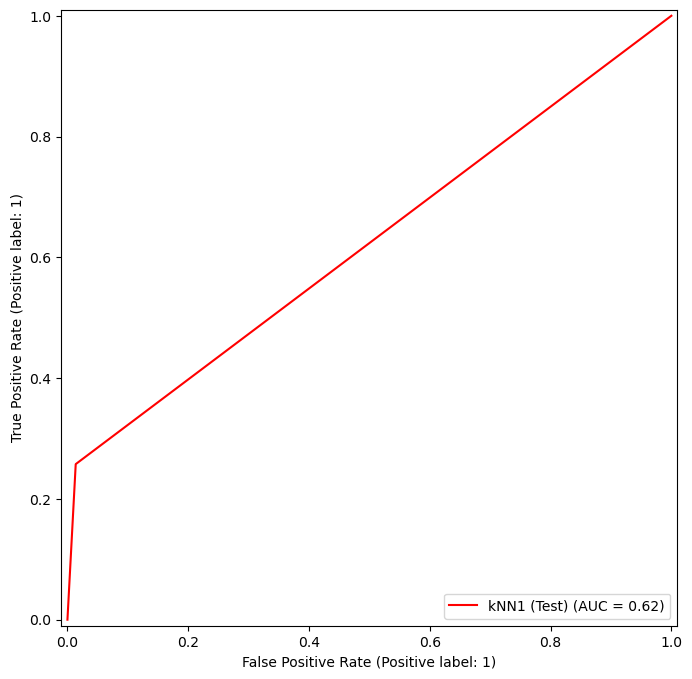

In [342]:
#creating an ROC plot and adding curves from new models to it
fig, ax = subplots(figsize=(8,8))
roc_curve_est(knn1,
              X_test_scaled,
              y_test,
              name='kNN1 (Test)',
              color='r',
              ax=ax);

In [343]:
#model using 3 nearest neighbors (k=3)
knn3 = KNeighborsClassifier(n_neighbors=3, weights='distance')
knn3.fit(X_train_scaled, y_train)

knn3_test = knn3.predict(X_test_scaled)

#confusion matrix
confusion_table(knn3_test, y_test)

Truth,0,1
Predicted,,
0,5155,53
1,26,13


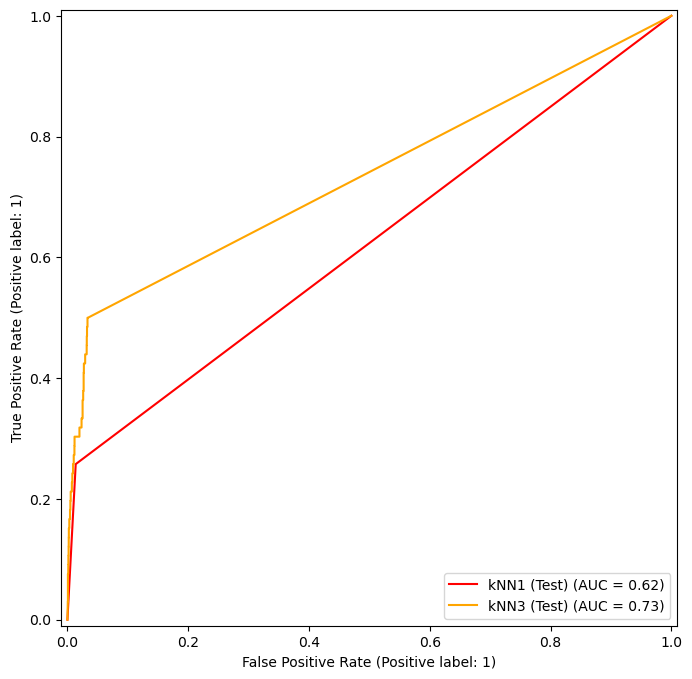

In [344]:
#adding k=3 model to the ROC curve
roc_curve_est(knn3,
              X_test_scaled,
              y_test,
              name='kNN3 (Test)',
              color='orange',
              ax=ax);

fig

In [345]:
#model using 5 nearest neighbors (k=5)
knn5 = KNeighborsClassifier(n_neighbors=5, weights='distance')
knn5.fit(X_train_scaled, y_train)

knn5_test = knn5.predict(X_test_scaled)

#confusion matrix
confusion_table(knn5_test, y_test)

Truth,0,1
Predicted,,
0,5165,50
1,16,16


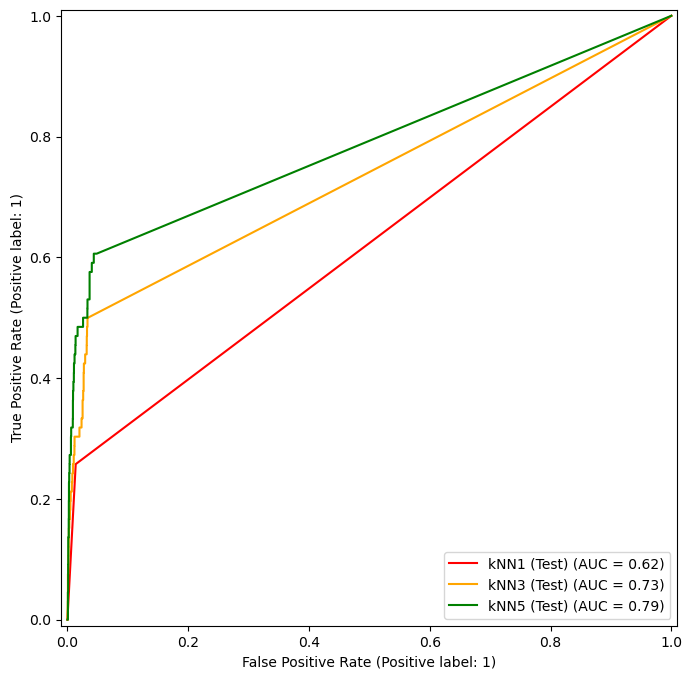

In [346]:
#adding k=5 model to the ROC curve
roc_curve_est(knn5,
              X_test_scaled,
              y_test,
              name='kNN5 (Test)',
              color='g',
              ax=ax);

fig

In [347]:
#model using 7 nearest neighbors (k=7)
knn7 = KNeighborsClassifier(n_neighbors=7, weights='distance')
knn7.fit(X_train_scaled, y_train)

knn7_test = knn7.predict(X_test_scaled)

#confusion matrix
confusion_table(knn7_test, y_test)

Truth,0,1
Predicted,,
0,5170,54
1,11,12


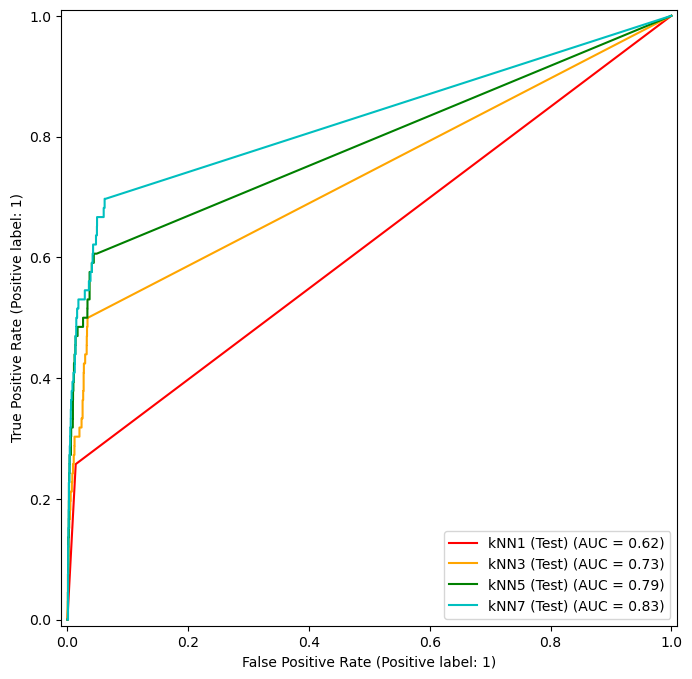

In [348]:
#adding k=7 model to the ROC curve
roc_curve_est(knn7,
              X_test_scaled,
              y_test,
              name='kNN7 (Test)',
              color='c',
              ax=ax);

fig

In [349]:
#model using 10 nearest neighbors (k=10)
knn10 = KNeighborsClassifier(n_neighbors=10, weights='distance')
knn10.fit(X_train_scaled, y_train)

knn10_test = knn10.predict(X_test_scaled)

#confusion matrix
confusion_table(knn10_test, y_test)

Truth,0,1
Predicted,,
0,5173,58
1,8,8


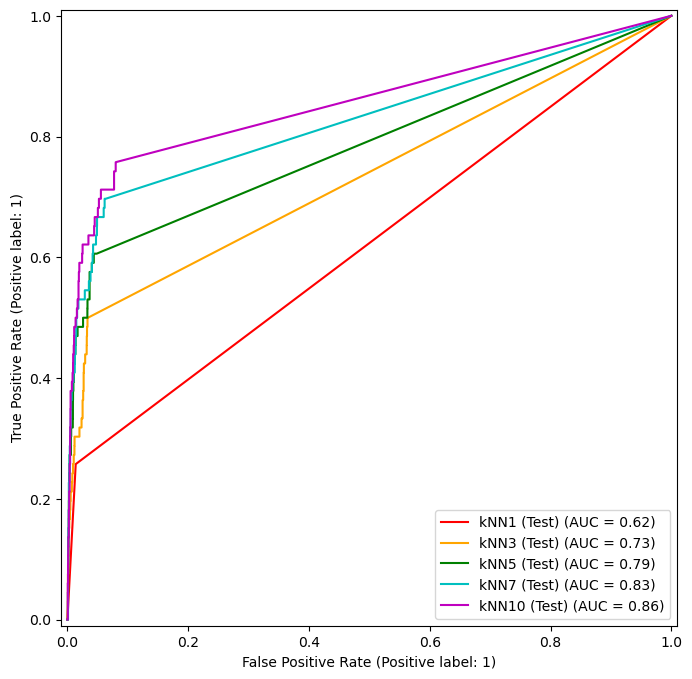

In [350]:
#adding k=10 model to the ROC curve
roc_curve_est(knn10,
              X_test_scaled,
              y_test,
              name='kNN10 (Test)',
              color='m',
              ax=ax);

fig

In [351]:
#model using 50 nearest neighbors (k=50)
knn50 = KNeighborsClassifier(n_neighbors=50, weights='distance')
knn50.fit(X_train_scaled, y_train)

knn15_test = knn50.predict(X_test_scaled)

#confusion matrix
confusion_table(knn15_test, y_test)

Truth,0,1
Predicted,,
0,5179,64
1,2,2


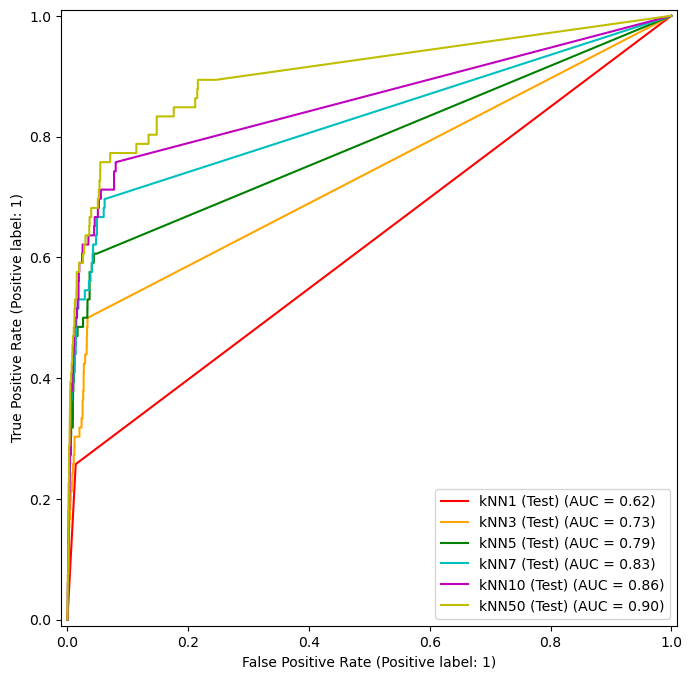

In [352]:
#adding k=50 model to the ROC curve
roc_curve_est(knn50,
              X_test_scaled,
              y_test,
              name='kNN50 (Test)',
              color='y',
              ax=ax);

fig

In [353]:
#model using 100 nearest neighbors (k=100)
knn100 = KNeighborsClassifier(n_neighbors=100, weights='distance')
knn100.fit(X_train_scaled, y_train)

knn100_test = knn100.predict(X_test_scaled)

#confusion matrix
confusion_table(knn100_test, y_test)

Truth,0,1
Predicted,,
0,5181,66
1,0,0


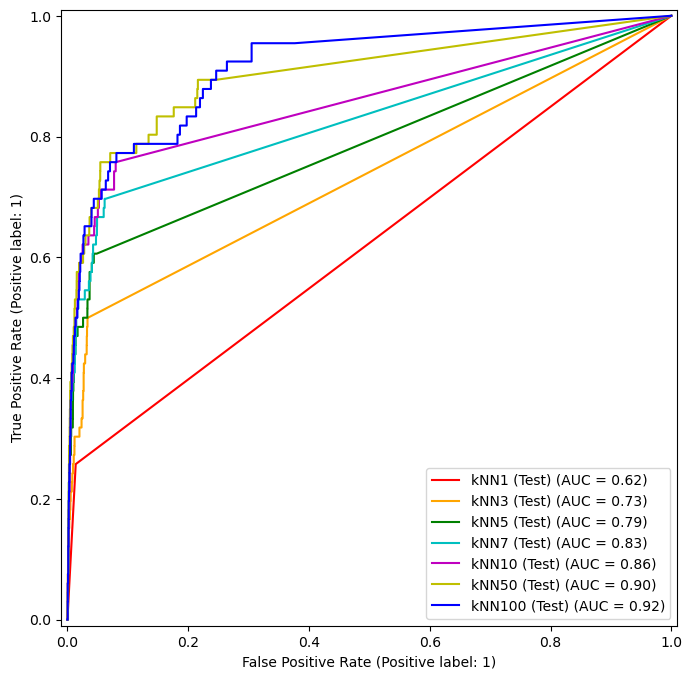

In [354]:
#adding k=100 model to the ROC curve
roc_curve_est(knn100,
              X_test_scaled,
              y_test,
              name='kNN100 (Test)',
              color='b',
              ax=ax);

fig

In [361]:
#function to predict HOF probability for specific players using knn50
def predict_hof_probability(player_names):
    
    #get player IDs from names
    player_ids = []
    for name in player_names:
        player_match = People[(People['nameFirst'] + ' ' + People['nameLast'] == name)]
        if len(player_match) > 0:
            player_ids.append(player_match.iloc[0]['playerID'])
        else:
            print(f"Player '{name}' not found in database")
            player_ids.append(None)
    
    #get batting stats of the players
    player_batting = Batting[Batting['playerID'].isin([pid for pid in player_ids if pid is not None])]
    
    #aggregate stats per player
    player_stats = player_batting.groupby('playerID').agg({
        'G': 'sum',
        'AB': 'sum', 
        'SO': 'sum',
        'R': 'sum',
        'H': 'sum',
        'RBI': 'sum',
        '2B': 'sum',
        'BB': 'sum'
    }).reset_index()

    #add rate statistics
    player_stats['AB_per_G'] = player_stats['AB'] / player_stats['G']
    player_stats['SO_per_G'] = player_stats['SO'] / player_stats['G']
    player_stats['R_per_G'] = player_stats['R'] / player_stats['G']
    player_stats['H_per_G'] = player_stats['H'] / player_stats['G']
    player_stats['RBI_per_G'] = player_stats['RBI'] / player_stats['G']
    player_stats['2B_per_G'] = player_stats['2B'] / player_stats['G']
    player_stats['BB_per_G'] = player_stats['BB'] / player_stats['G']
    
    player_stats = player_stats.merge(People[['playerID', 'nameFirst', 'nameLast']], on='playerID', how='left')
    player_stats['FullName'] = player_stats['nameFirst'] + ' ' + player_stats['nameLast']
    
    #use rate-based features for prediction
    X_players = player_stats[features]
    
    #scale features
    X_players_scaled = scaler.transform(X_players)
    
    #make predictions using knn50 model
    probabilities = knn7.predict_proba(X_players_scaled)[:, 1]
    predictions = knn7.predict(X_players_scaled)
    
    #create results dataframe
    results = pd.DataFrame({
        'Player': player_stats['FullName'],
        'HOF_Probability': probabilities,
        'Predicted_HOF': predictions
    })
    
    return results.sort_values('HOF_Probability', ascending=False)

In [362]:
# Test with known Hall of Famers
known_hof_players = [
    "Babe Ruth",
    "Hank Aaron", 
    "Willie Mays",
    "Ted Williams",
    "Lou Gehrig"
]

print("\nKnown Hall of Famers - knn50 Model (Rate Statistics Only):")
print("=" * 60)
hof_validation = predict_hof_probability(known_hof_players)
for idx, row in hof_validation.iterrows():
    status = "✓ HOF" if row['Predicted_HOF'] == 1 else "✗ Not HOF"
    print(f"{row['Player']:20} | {row['HOF_Probability']:.1%} | {status}")

# Test with active players
active_players = [
    "Juan Soto",
    "Shohei Ohtani", 
    "Aaron Judge",
    "Tim Anderson",
    "Joey Gallo"
]

print("\nActive Players - knn50 Model (Rate Statistics Only):")
print("=" * 60)
active_predictions = predict_hof_probability(active_players)
for idx, row in active_predictions.iterrows():
    status = "✓ Future HOF" if row['Predicted_HOF'] == 1 else "✗ Unlikely HOF"
    print(f"{row['Player']:20} | {row['HOF_Probability']:.1%} | {status}")


Known Hall of Famers - knn50 Model (Rate Statistics Only):
Hank Aaron           | 100.0% | ✓ HOF
Ted Williams         | 100.0% | ✓ HOF
Willie Mays          | 62.0% | ✓ HOF
Lou Gehrig           | 60.2% | ✓ HOF
Babe Ruth            | 59.2% | ✓ HOF

Active Players - knn50 Model (Rate Statistics Only):
Aaron Judge          | 18.4% | ✗ Unlikely HOF
Tim Anderson         | 0.0% | ✗ Unlikely HOF
Joey Gallo           | 0.0% | ✗ Unlikely HOF
Shohei Ohtani        | 0.0% | ✗ Unlikely HOF
Juan Soto            | 0.0% | ✗ Unlikely HOF
